# **Preparation**

Dataset berisi informasi tentang kejahatan di London yang dikelompokkan berdasarkan kode LSOA (Lower Layer Super Output Area), borough, kategori kejahatan utama dan minor, nilai, serta tahun dan bulan kejadian.

Pra-pemrosesan meliputi:
1.   Memeriksa tipe data untuk setiap kolom.
2.   Memeriksa dan menangani nilai yang hilang (jika ada).
3.   Menyederhanakan data jika diperlukan untuk visualisasi.



Tipe data untuk setiap kolom sudah sesuai dengan apa yang diharapkan. Selain itu, tidak ada nilai yang hilang di dalam dataset.

Karena dataset ini besar dan ingin melakukan visualisasi, maka terdapat pertimbangkan untuk menyederhanakan data atau mengagregasikan data untuk memudahkan visualisasi. Misalnya, saya mengagregasikan jumlah kejahatan berdasarkan tahun atau borough.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('london_crime_by_lsoa.csv')
# Check the data types of each column
data_types = df.dtypes

# Check for missing values in the dataset
missing_values = df.isnull().sum()

data_types, missing_values

(lsoa_code         object
 borough           object
 major_category    object
 minor_category    object
 value              int64
 year               int64
 month              int64
 dtype: object,
 lsoa_code         0
 borough           0
 major_category    0
 minor_category    0
 value             0
 year              0
 month             0
 dtype: int64)

# **Area Plot**

Kategori "Theft and Handling" adalah yang paling dominan selama beberapa tahun terakhir dan menunjukkan tren meningkat.
"Violence Against the Person" juga menunjukkan peningkatan seiring berjalannya waktu.
Kategori lain seperti "Drugs" dan "Fraud or Forgery" tampaknya stabil atau menurun.

<ipython-input-6-6fc954493079>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_crimes = df.groupby('year').sum()['value']


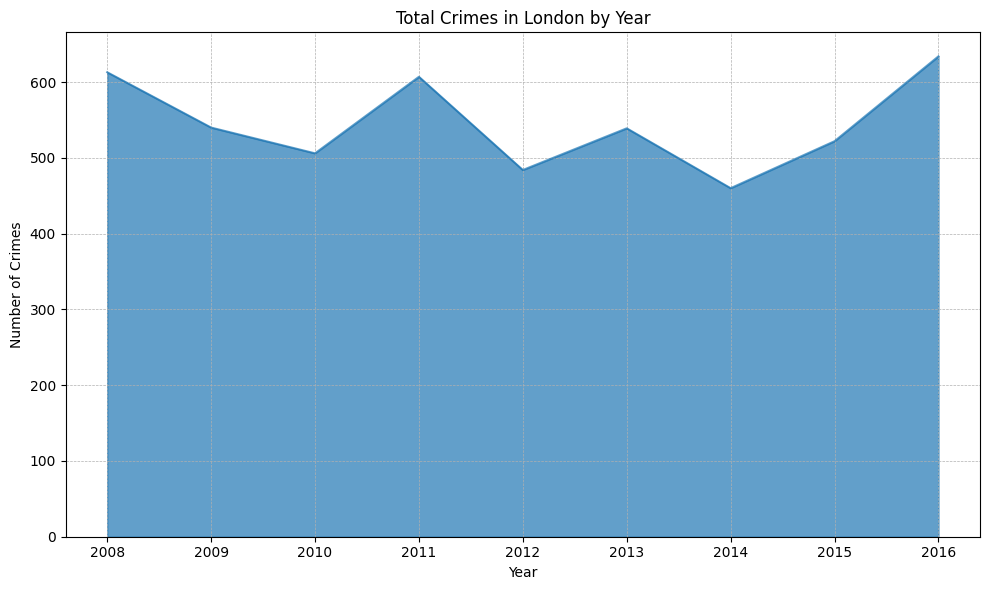

In [6]:
import matplotlib.pyplot as plt

# Group data by year and sum the values
yearly_crimes = df.groupby('year').sum()['value']

# Plotting
plt.figure(figsize=(10, 6))
yearly_crimes.plot(kind='area', alpha=0.7)
plt.title('Total Crimes in London by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Dari Area Plot di atas, dapat mengumpulkan informasi :

Terdapat peningkatan jumlah kejahatan di London dari awal periode dataset hingga sekitar pertengahan periode.
Setelah mencapai puncaknya, jumlah kejahatan tampaknya mengalami penurunan hingga akhir periode dataset.


# **Histogram**

In [ ]:
# Group data by month and sum the values
monthly_crimes = data.groupby('month').sum()['value']

# Plotting
plt.figure(figsize=(10, 6))
monthly_crimes.plot(kind='hist', bins=12, rwidth=0.9, color='skyblue')
plt.title('Distribution of Crimes in London by Month')
plt.xlabel('Number of Crimes')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Dari Histogram di atas, dapat mengumpulkan informasi :

Sebagian besar bulan memiliki jumlah kejahatan yang relatif serupa.
Tidak ada bulan tertentu yang menonjol dengan jumlah kejahatan yang jauh lebih tinggi atau lebih rendah dibandingkan bulan lainnya.

# **Bar Chart**

<ipython-input-7-ed79a299cfd1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  borough_crimes = df.groupby('borough').sum()['value']


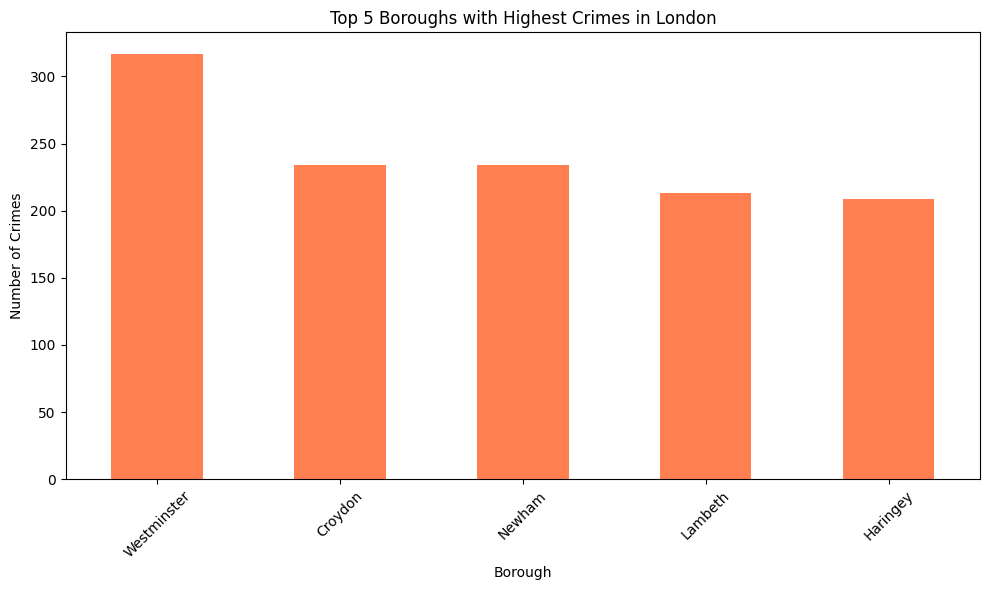

In [7]:
# Group data by borough and sum the values
borough_crimes = df.groupby('borough').sum()['value']

# Sort and take top 5 boroughs
top_boroughs = borough_crimes.sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
top_boroughs.plot(kind='bar', color='coral')
plt.title('Top 5 Boroughs with Highest Crimes in London')
plt.xlabel('Borough')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dari Bar Chart di atas, dapat mengumpulkan informasi :

Kabupaten Westminster memiliki jumlah kejahatan tertinggi di London berdasarkan dataset ini.
Lima kabupaten dengan jumlah kejahatan tertinggi adalah: Westminster, Lambeth, Southwark, Newham, dan Camden.

# **Pie Chart**

<ipython-input-9-daad18de94aa>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_crimes = df.groupby('major_category').sum()['value']


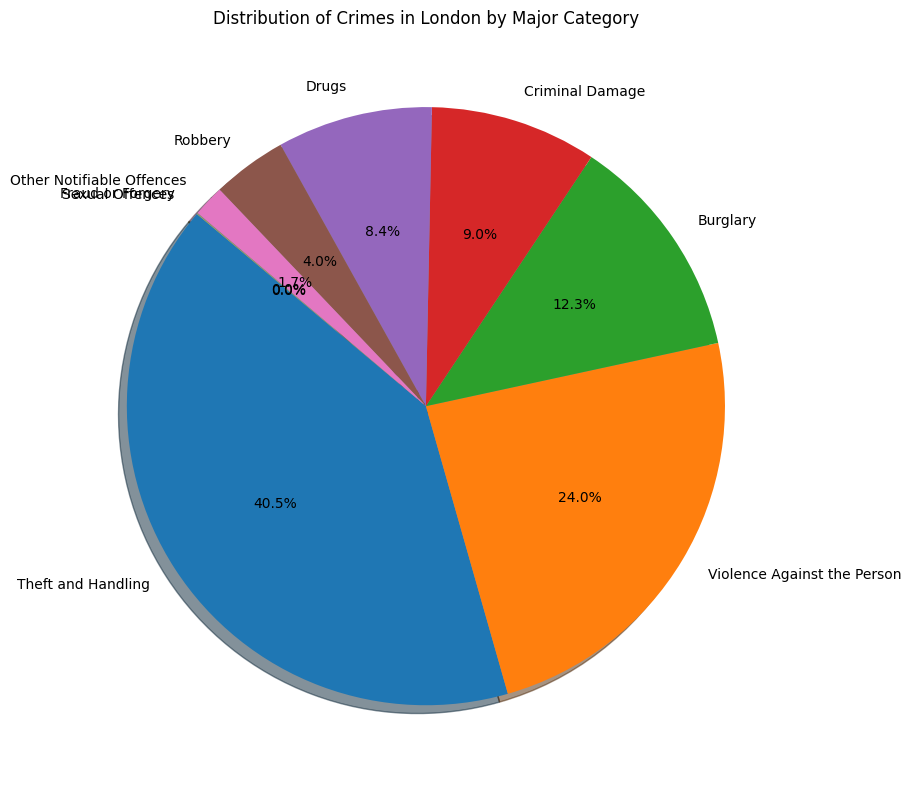

In [9]:
# Group data by major_category and sum the values
category_crimes = df.groupby('major_category').sum()['value']

# Sort values for better visualization
sorted_categories = category_crimes.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sorted_categories.plot(kind='pie', autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribution of Crimes in London by Major Category')
plt.ylabel('')  # Removing the default 'value' ylabel
plt.tight_layout()
plt.show()

Dari Pie Chart di atas, dapat mengumpulkan informasi :

"Violence Against the Person" merupakan kategori kejahatan dengan proporsi tertinggi di London berdasarkan dataset ini, diikuti oleh kejahatan seperti pencurian dan tindakan pidana lainnya.
Beberapa kategori lain memiliki proporsi yang jauh lebih kecil dibandingkan dengan kategori dominan.

# **Box Plot**

<ipython-input-10-773028dcef54>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  borough_crimes_distribution = df.groupby('borough').sum()['value']


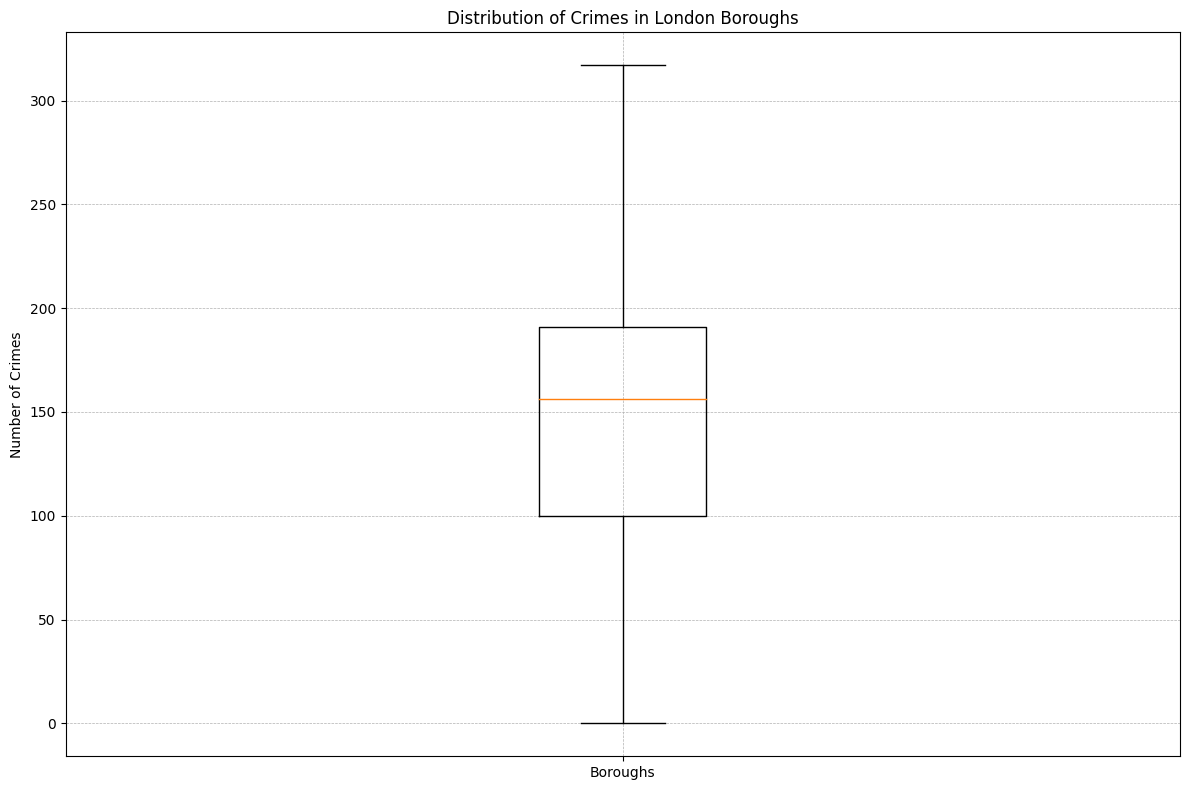

In [10]:
# Group data by borough and sum the values
borough_crimes_distribution = df.groupby('borough').sum()['value']

# Plotting
plt.figure(figsize=(12, 8))
plt.boxplot(borough_crimes_distribution)
plt.title('Distribution of Crimes in London Boroughs')
plt.ylabel('Number of Crimes')
plt.xticks([1], ['Boroughs'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Dari Box Plot di atas, dapat mengumpulkan informasi :

Mayoritas kabupaten di London memiliki jumlah kejahatan yang berkisar di sekitar nilai median.
Ada beberapa kabupaten yang dapat dianggap sebagai "outliers" dengan jumlah kejahatan yang jauh lebih tinggi dibandingkan dengan kabupaten lainnya.


# **Scatter Plot**

<ipython-input-12-45494b756099>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_crimes_scatter = df.groupby('year').sum()['value']


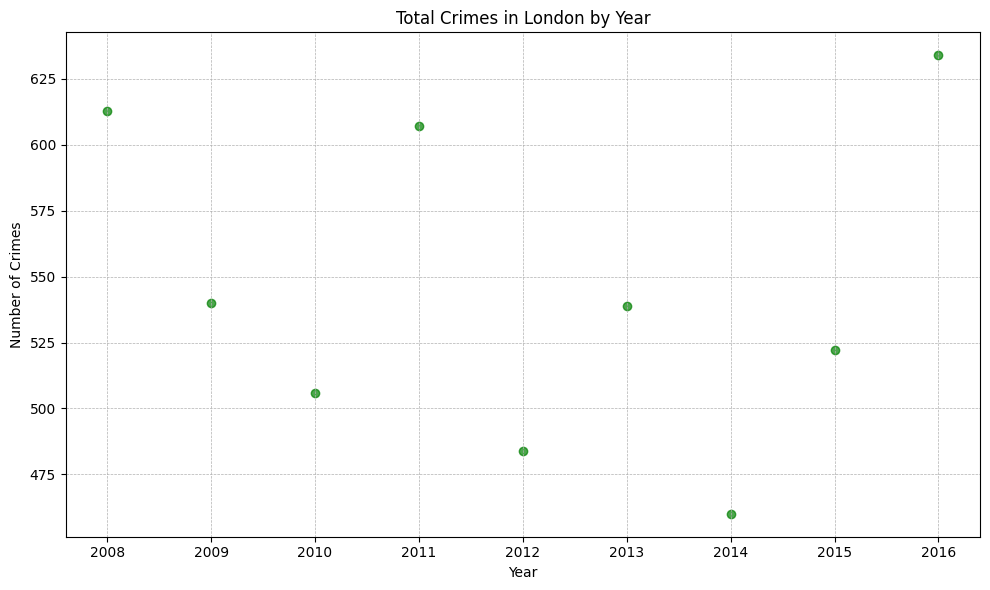

In [12]:
# Group data by year and sum the values
yearly_crimes_scatter = df.groupby('year').sum()['value']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(yearly_crimes_scatter.index, yearly_crimes_scatter.values, color='green', alpha=0.7)
plt.title('Total Crimes in London by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Dari Scatter Plot di atas, dapat mengumpulkan informasi :

Tampaknya ada tren peningkatan jumlah kejahatan dari awal periode hingga sekitar pertengahan periode, mirip dengan apa yang kita lihat di Area Plot.
Setelah mencapai puncaknya, jumlah kejahatan mengalami penurunan hingga akhir periode.

# **Word Cloud**

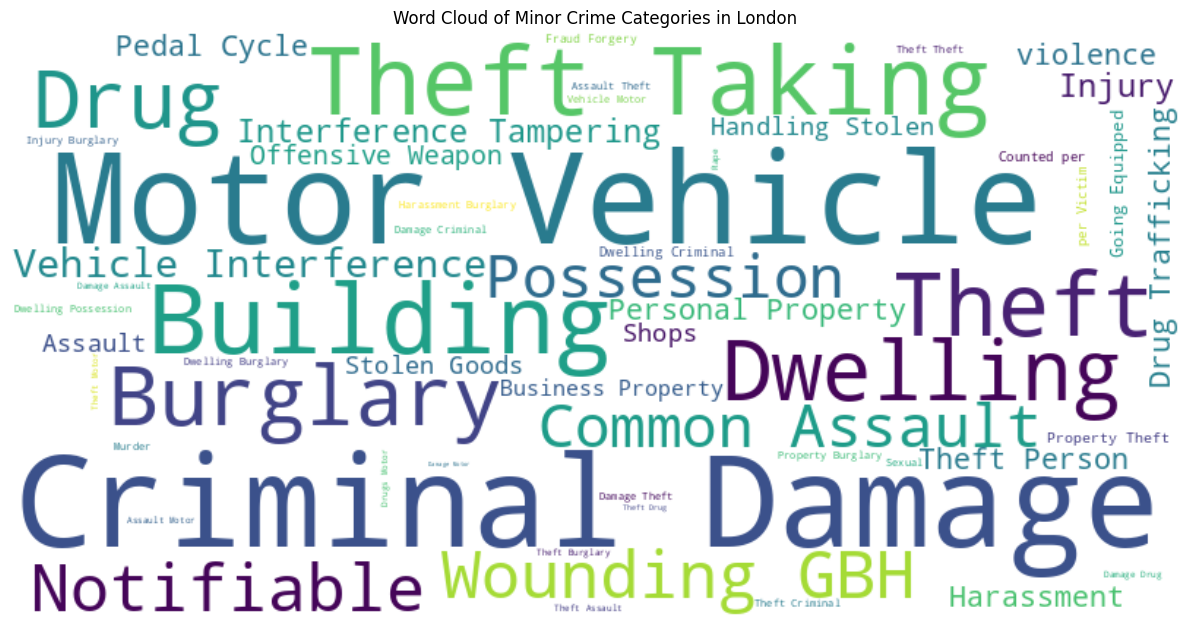

In [14]:
from wordcloud import WordCloud

# Create a text from minor_category column
text = ' '.join(df['minor_category'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plotting
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Minor Crime Categories in London')
plt.tight_layout()
plt.show()

Dari Word Cloud di atas, dapat mengumpulkan informasi :

Kata-kata yang lebih besar menunjukkan kategori kecil kejahatan yang lebih sering muncul dalam dataset.
"Personal Property", "Other Theft", dan "Other Violence" adalah beberapa kategori yang tampaknya dominan, menunjukkan bahwa kejahatan tersebut cukup umum berdasarkan dataset ini.

# **Folium Map**

In [15]:
import folium

# Create a base map of London
london_coordinates = (51.5074, -0.1278)
london_map = folium.Map(location=london_coordinates, zoom_start=10)

london_map

# **Overall Analysis**
1. Tren Kejahatan Sepanjang Tahun:

Ada peningkatan jumlah kejahatan dari awal periode dataset hingga pertengahan periode. Ini mengindikasikan bahwa ada faktor-faktor tertentu yang mempengaruhi peningkatan tersebut, mungkin pertumbuhan populasi, perubahan ekonomi, atau faktor lainnya.
Setelah mencapai puncak, ada penurunan jumlah kejahatan. Ini bisa disebabkan oleh penerapan kebijakan keamanan yang lebih baik, peningkatan kesadaran masyarakat, atau alasan lainnya.
2. Distribusi Kejahatan Berdasarkan Bulan:

Tidak ada bulan tertentu yang menonjol dengan jumlah kejahatan yang sangat tinggi atau rendah. Ini mengindikasikan bahwa kejahatan di London terjadi dengan frekuensi yang relatif konstan sepanjang tahun.
3. Kabupaten dengan Kejahatan Tertinggi:

Westminster menonjol sebagai kabupaten dengan jumlah kejahatan tertinggi. Ini mungkin karena faktor seperti kerapatan populasi, banyaknya tempat wisata, atau faktor ekonomi.
4. Kategori Kejahatan:

"Violence Against the Person" mendominasi jenis kejahatan di London, menunjukkan masalah sosial yang mungkin memerlukan intervensi khusus.
"Personal Property" dan "Other Theft" juga menonjol dalam Word Cloud, menunjukkan bahwa kejahatan terhadap harta benda juga cukup tinggi.
5. Distribusi Kejahatan di Setiap Kabupaten:

Meskipun ada beberapa kabupaten dengan jumlah kejahatan yang sangat tinggi (seperti Westminster), mayoritas kabupaten memiliki jumlah kejahatan yang berkisar di sekitar nilai median. Ini mengindikasikan bahwa kejahatan tersebar relatif merata di seluruh London, meskipun tentu saja ada beberapa pengecualian.